# Symbols

In [1]:
from sympy import *
init_printing()

We must explicitly state which variables correspond to mathematical symbols:

In [2]:
x = Symbol('x')

sin(x+1)/exp(x)

In [3]:
t0 = Symbol('theta_0')

sin(t0+1)/exp(t0)

In the above, `theta_0` produces the symbol $\theta_0$ in *LaTeX*, a popular typesetting system for mathematics. `sympy` understands this and displays the symbol correctly.

The `symbols` function (note the lowercase "s") allows us to define several symbols at once:

In [4]:
t, s, a = symbols('t, s, a')

# Calculus

To take derivatives, we use the `diff` function, specifying the variable we wish to differentiate with respect to:

In [5]:
diff(cos(x), x)

To take the second derivative, we differentiate with respect to $x$ twice:

In [6]:
diff(cos(x), x, x)

Integration is similar:

In [7]:
integrate(cos(x), x)

Definite integrals are performed as follows. Let's compute

$$
    \int_0^\infty e^{-x}\,dx.
$$

In [8]:
integrate(exp(-x), (x, 0, oo))

**Note:** Sympy uses a double lowercase o ("oh") to denote infinity, as seen above.

# Laplace transforms

We can compute a Laplace transform as follows. Setting `noconds=True` tells the `laplace_transform` function that we do not care about convergence conditions.

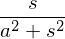

In [9]:
laplace_transform(cos(a*t), t, s, noconds=True)

Taking inverse transforms is also easy:

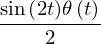

In [10]:
inverse_laplace_transform(1/(s**2+4), s, t)

Note that the unit step function is denoted $\theta(t)$ by `sympy`. For our purposes, we can take $\theta(t)=1$. For more complicated inverse transforms, sympy appreciates a partial fraction expansion, just like we would do when taking inverse transforms by hand.

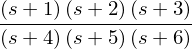

In [11]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))
F

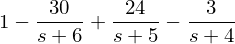

In [12]:
F.apart() # partial fraction expansion

Compare the following two inverse transforms. As you can see, `sympy` preferred to be given the expanded function.

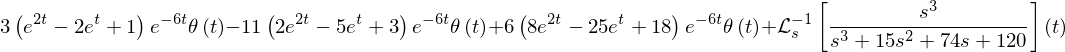

In [13]:
inverse_laplace_transform(F, s, t)

In [14]:
inverse_laplace_transform(F.apart(), s, t)

# Differential equations

Differential equations can be solved directly, without considering Laplace transforms (even if `sympy` uses them under the hood).

First, we must specify that $f$ is some (as yet unknown) function:

In [15]:
f = Function('f')
t = Symbol('t')

Now, `Derivative(f(t), t)` and `Derivative(f(t), t, t)` represent the first and second derivatives, respectively.

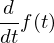

In [16]:
Derivative(f(t), t)

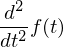

In [17]:
Derivative(f(t), t, t)

Alternatively, you can use `f(t).diff(t)` and `f(t).diff(t, t)`.

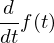

In [18]:
f(t).diff(t)

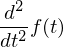

In [19]:
f(t).diff(t, t)

Let's solve the second-order differential equation
$$
    f''(t)-f'(t)-6f(t)=e^t.
$$
for $f(t)$ using the `dsolve` function.

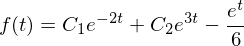

In [20]:
dsolve(Derivative(f(t), t, t) - Derivative(f(t), t) - 6*f(t) - exp(t), f(t))

In the above, note that we had to represent the differential equation in the form
$$
    f''(t)-f'(t)-6f(t)-e^t=0,
$$
that is, we moved $e^t$ to the left hand side of the equals sign.

Now suppose we want to find the particular solution satisfying the initial conditions
$$
    f(0)=f'(0)=0.
$$

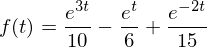

In [21]:
conditions = {f(0): 0, f(t).diff(t).subs(t, 0): 0} # a Python dictionary

dsolve(Derivative(f(t), t, t) - Derivative(f(t), t) - 6*f(t) - exp(t), f(t), ics=conditions)

**Note:** In the above, `.subs(t, 0)` substituted the value 0 into the mathematical expression for $f'(t)$.

Actually, we can use `subs` more generally:

In [22]:
F = x**2 + x + 2
F

In [23]:
F.subs(x, t)

In [24]:
F.subs(x, 4)

# Practice

Get some practice using `sympy` for calculus by solving some of the problems from problem sets 5 and 6.